In [4]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
## 1. 전쟁데이터 데이터프레임만들기

In [12]:
ls_war = pd.read_excel("datas/list_of_war.xlsx")
ls_war.head(3
           )

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,전쟁원인,힘_참전국,병력_참전국,힘_상대국,병력_상대국,사상자및손실_참전국,사상자및손실_상대국,NaN
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",NaN,KDP및PUK:70000 ~ 40명의 미국인,70000,"Ansar al-Islam : 700-1000명의 전투기, IUM : 40명의 전투기",1000,최소45명사망 및 93명부상,200명이상사망,NaN
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도","필리핀공화국,미국",지하디스크그룹,NaN,"미국:500-6000, 필리핀:110,000",110500,5300,5300,17명사망,NaN,NaN
4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널","벨기에,캐나다,덴마크,프랑스,독일,그리스,이탈리아,네덜란드,포르투갈,스페인,터키,영...","이라크,알카에다,Harkat al-Shabaad Mujahedeen, al-Itih...",NaN,소말리아에서개인500명,500,NaN,NaN,"미국2명사망,6명부상,전투외사망자33명, 한국 3명부상","이슬람반군:소말리이아에서 1,230~1,367명의무장세력사망, 해적:1,200명이상체포",NaN


In [13]:
ls_war.loc[0]

Unnamed: 0           발발시점
Unnamed: 1           종료시점
Unnamed: 2           갈등이름
Unnamed: 3           갈등종류
Unnamed: 4             위치
Unnamed: 5            참전국
Unnamed: 6            상대국
Unnamed: 7           전쟁원인
Unnamed: 8          힘_참전국
Unnamed: 9         병력_참전국
Unnamed: 10         힘_상대국
Unnamed: 11        병력_상대국
Unnamed: 12    사상자및손실_참전국
Unnamed: 13    사상자및손실_상대국
Unnamed: 14           NaN
Name: 0, dtype: object

In [23]:
ls_war_rename = ls_war.rename(columns  = {"Unnamed: 0" : "발발시점",
                          "Unnamed: 1" : "종료시점",
                          "Unnamed: 2" : "갈등이름",
                          "Unnamed: 3" : "갈등종류",
                          "Unnamed: 4" : "위치",
                          "Unnamed: 5" : "참전국",
                          "Unnamed: 6" : "상대국",
                          "Unnamed: 7" : "전쟁원인",
                          "Unnamed: 8" : "힘_참전국",
                          "Unnamed: 9" : "병력_참전국",
                          "Unnamed: 10" : "힘_상대국",
                          "Unnamed: 11" : "병력_상대국",
                          "Unnamed: 12" : "사상자및손실_참전국",
                          "Unnamed: 13" : "사상자및손실_상대국"}, inplace=False)

ls_war_rename = ls_war_rename.drop(index=[0])
ls_war_rename.head(2)

,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,전쟁원인,힘_참전국,병력_참전국,힘_상대국,병력_상대국,사상자및손실_참전국,사상자및손실_상대국,Unnamed: 14
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",NaN,KDP및PUK:70000 ~ 40명의 미국인,70000,"Ansar al-Islam : 700-1000명의 전투기, IUM : 40명의 전투기",1000,최소45명사망 및 93명부상,200명이상사망,NaN
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ls_war2 = ls_war_rename.drop(['전쟁원인','힘_참전국','힘_상대국','사상자및손실_참전국','사상자및손실_상대국','Unnamed: 14'], axis=1)
ls_war2.head()

,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,병력_참전국,병력_상대국
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",70000,1000
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN
3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도","필리핀공화국,미국",지하디스크그룹,110500,5300
4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널","벨기에,캐나다,덴마크,프랑스,독일,그리스,이탈리아,네덜란드,포르투갈,스페인,터키,영...","이라크,알카에다,Harkat al-Shabaad Mujahedeen, al-Itih...",500,NaN
5,2006,현재,탈레반반란,테러,아프가니스탄,"아프가니스탄,호주,크로아티아,체코공화국,그루지야,독일,이탈리아,루마니아,스페인,터키...","탈레반, 파키스탄, 러시아, 중국, 카타르, 이란, 사우디아라비아, Hezb-e-I...",352000,64000


In [27]:
## 2. 참전국-상대국병력 합산해서 전쟁규모 컬럼만들기

In [29]:
ls_war2['전쟁규모'] = ls_war2['병력_참전국'] + ls_war2['병력_상대국']
ls_war2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발발시점    30 non-null     object
 1   종료시점    30 non-null     object
 2   갈등이름    30 non-null     object
 3   갈등종류    30 non-null     object
 4   위치      30 non-null     object
 5   참전국     30 non-null     object
 6   상대국     28 non-null     object
 7   병력_참전국  27 non-null     object
 8   병력_상대국  24 non-null     object
 9   전쟁규모    24 non-null     object
dtypes: object(10)
memory usage: 3.6+ KB


In [30]:
ls_war2.head(2)

,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,병력_참전국,병력_상대국,전쟁규모
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",70000,1000,71000
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN,NaN


In [37]:
ls_war2['참전국']

1                                쿠르드족애국연합,쿠르디스탄민주당,미국육군
2     미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...
3                                             필리핀공화국,미국
4     벨기에,캐나다,덴마크,프랑스,독일,그리스,이탈리아,네덜란드,포르투갈,스페인,터키,영...
5     아프가니스탄,호주,크로아티아,체코공화국,그루지야,독일,이탈리아,루마니아,스페인,터키...
6     미국,영국,호주,루마니아,아제르바이잔,쿠웨이트,에스토니아,엘살바도르,불가리아,몰도바...
7                                   쿠르드족자유생활당, 이스라엘, 미국
8                         예멘,사우디아라비아,벨라루스,요르단,모로코,수단,미국
9                                          파라과이,미국,콜롬비아
10                                           파타, 미국, 영국
11                                              이스라엘,미국
12                         이라크보안군,미국,영국,다른연합국,Peshmerga
13                                       멕시코,미국,콜롬비아,호주
14                     에티오피아,미국,우간다,부룬디,나이지리아,가나,말라위,영국
15    알제리,모로코,모리타니,튀니지,부키나파소,차드,말리,니제르,나이지리아,세네갈,미국,...
16                    코모로,세네갈,수단,탄자니아,프랑스,리비아아랍자마히리야,미국
17    나이지리아,카메룬,차드,니제르,베기에,베냉,캐나다,중국,파키스탄,콜롬비아,이집트,프...
18     소말리아,부룬디지부티,에티오피아,가나,케냐,나이지리아,세에라리온,우간다,미

In [80]:
ls = len(ls_war2['참전국'])

30

In [68]:
involving_country = ls_war2.loc[1, ['참전국']]

In [69]:
len(involving_country[0].split(','))

3

In [90]:
ls = len(ls_war2['참전국'])

for idx in range(0,ls):
    involving_country = ls_war2.loc[idx+1, ['참전국']]
    ls_war2["참전국수"] = len(involving_country[0].split(','))
ls_war2.head()

,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,병력_참전국,병력_상대국,전쟁규모,참전국수,참가국수
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",70000,1000,71000,13,13
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN,NaN,13,13
3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도","필리핀공화국,미국",지하디스크그룹,110500,5300,115800,13,13
4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널","벨기에,캐나다,덴마크,프랑스,독일,그리스,이탈리아,네덜란드,포르투갈,스페인,터키,영...","이라크,알카에다,Harkat al-Shabaad Mujahedeen, al-Itih...",500,NaN,NaN,13,13
5,2006,현재,탈레반반란,테러,아프가니스탄,"아프가니스탄,호주,크로아티아,체코공화국,그루지야,독일,이탈리아,루마니아,스페인,터키...","탈레반, 파키스탄, 러시아, 중국, 카타르, 이란, 사우디아라비아, Hezb-e-I...",352000,64000,416000,13,13


In [93]:
ls = len(ls_war2['참전국'])

for idx in range(0,ls):
    involving_country = ls_war2.loc[idx+1, ['참전국']]
    count = len(involving_country[0].split(','))
    ls_war2.loc[idx+1, "참전국수"] = count
ls_war2.head()

,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,병력_참전국,병력_상대국,전쟁규모,참전국수,참가국수
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",70000,1000,71000,3,13
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN,NaN,48,13
3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도","필리핀공화국,미국",지하디스크그룹,110500,5300,115800,2,13
4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널","벨기에,캐나다,덴마크,프랑스,독일,그리스,이탈리아,네덜란드,포르투갈,스페인,터키,영...","이라크,알카에다,Harkat al-Shabaad Mujahedeen, al-Itih...",500,NaN,NaN,38,13
5,2006,현재,탈레반반란,테러,아프가니스탄,"아프가니스탄,호주,크로아티아,체코공화국,그루지야,독일,이탈리아,루마니아,스페인,터키...","탈레반, 파키스탄, 러시아, 중국, 카타르, 이란, 사우디아라비아, Hezb-e-I...",352000,64000,416000,15,13


In [96]:
ls_war2 = ls_war2.rename(columns  = {"참가국수" : "전쟁수"}, inplace=False)

ls_war2["전쟁수"] = 1
ls_war2.head()

,발발시점,종료시점,갈등이름,갈등종류,위치,참전국,상대국,병력_참전국,병력_상대국,전쟁규모,참전국수,전쟁수
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,"쿠르드족애국연합,쿠르디스탄민주당,미국육군","알카에다,ISIL,아프간탈레반,파키스탄탈레반",70000,1000,71000,3,1
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,"미국,영국,프랑스,러시아,알바니아,벨기에,불가리아,캐나다,크로아티아,체코공화국,덴마...",NaN,NaN,NaN,NaN,48,1
3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도","필리핀공화국,미국",지하디스크그룹,110500,5300,115800,2,1
4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널","벨기에,캐나다,덴마크,프랑스,독일,그리스,이탈리아,네덜란드,포르투갈,스페인,터키,영...","이라크,알카에다,Harkat al-Shabaad Mujahedeen, al-Itih...",500,NaN,NaN,38,1
5,2006,현재,탈레반반란,테러,아프가니스탄,"아프가니스탄,호주,크로아티아,체코공화국,그루지야,독일,이탈리아,루마니아,스페인,터키...","탈레반, 파키스탄, 러시아, 중국, 카타르, 이란, 사우디아라비아, Hezb-e-I...",352000,64000,416000,15,1


In [106]:
ls_war2.head()

,발발시점,종료시점,갈등이름,갈등종류,위치,전쟁규모,참전국수,전쟁수
1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,71000,3,1
2,2001.9.11,현재,테러와의전쟁,테러,글로벌,NaN,48,1
3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도",115800,2,1
4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널",NaN,38,1
5,2006,현재,탈레반반란,테러,아프가니스탄,416000,15,1


In [107]:
ls_war2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발발시점    30 non-null     object
 1   종료시점    30 non-null     object
 2   갈등이름    30 non-null     object
 3   갈등종류    30 non-null     object
 4   위치      30 non-null     object
 5   전쟁규모    24 non-null     object
 6   참전국수    30 non-null     int64 
 7   전쟁수     30 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


In [3]:
## 3. 데이터프레임 저장하기

In [110]:
ls_war2.to_csv("datas/ls_war2.csv", sep="\t")

In [111]:
pd.read_csv("datas/ls_war2.csv", sep='\t')

,Unnamed: 0,발발시점,종료시점,갈등이름,갈등종류,위치,전쟁규모,참전국수,전쟁수
0,1,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,71000.0,3,1
1,2,2001.9.11,현재,테러와의전쟁,테러,글로벌,NaN,48,1
2,3,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도",115800.0,2,1
3,4,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널",NaN,38,1
4,5,2006,현재,탈레반반란,테러,아프가니스탄,416000.0,15,1
5,6,2003.3.20,2011.12.18,이라크전쟁,테러,이라크,NaN,41,1
6,7,2004.4.1,2015.8,이란-PJAK충돌,민족,"아제르바이잔,이란,이라크,터키",17000.0,3,1
7,8,2004.4.18,2014.9.16,예멘의 Houthi 반란,내란,예멘,32000.0,7,1
8,9,2005.8.27,현재,파라과이인민군반란,내란,파라과이,3650.0,3,1
9,10,2006.1.25,현재,파타-하마스 분쟁,테러,가자지구,55000.0,3,1


In [ ]:
## 4. 전쟁종류, 규모 등 그래프로 그리기

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
%matplotlib inline

f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
rc('font', family='Malgun Gothic')
%matplotlib inline

In [164]:
ls_war2 = pd.read_csv("datas/ls_war2.csv", sep='\t')
ls_war2 = ls_war2.drop(["Unnamed: 0"], axis=1)
ls_war2.head(10)

,발발시점,종료시점,갈등이름,갈등종류,위치,전쟁규모,참전국수,전쟁수
0,2001.9,2003.3,쿠르드이슬람교분쟁,민족,이라크 쿠르디스탄,71000.0,3,1
1,2001.9.11,현재,테러와의전쟁,테러,글로벌,NaN,48,1
2,2002.1.15,2015.2.24,영원한자유작전-필리핀,테러,"만다나오,필리핀제도",115800.0,2,1
3,2002.10.7,현재,영원한자유작전-아프리카의뿔,테러,"아프리카의뿔,아덴만,Guardafui채널",NaN,38,1
4,2006,현재,탈레반반란,테러,아프가니스탄,416000.0,15,1
5,2003.3.20,2011.12.18,이라크전쟁,테러,이라크,NaN,41,1
6,2004.4.1,2015.8,이란-PJAK충돌,민족,"아제르바이잔,이란,이라크,터키",17000.0,3,1
7,2004.4.18,2014.9.16,예멘의 Houthi 반란,내란,예멘,32000.0,7,1
8,2005.8.27,현재,파라과이인민군반란,내란,파라과이,3650.0,3,1
9,2006.1.25,현재,파타-하마스 분쟁,테러,가자지구,55000.0,3,1


In [131]:
ls_war2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발발시점    30 non-null     object 
 1   종료시점    30 non-null     object 
 2   갈등이름    30 non-null     object 
 3   갈등종류    30 non-null     object 
 4   위치      30 non-null     object 
 5   전쟁규모    24 non-null     float64
 6   참전국수    30 non-null     int64  
 7   전쟁수     30 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.0+ KB


In [143]:
lw2_pv1 = ls_war2.pivot_table("전쟁규모","갈등종류", aggfunc=np.sum)
lw2_pv1

,전쟁규모
갈등종류,
내란,2096150.0
마약,361500.0
민족,88000.0
테러,1107149.0
해적,76850.0


In [145]:
lw2_pv2 = ls_war2.pivot_table("참전국수","갈등종류", aggfunc=np.sum)
lw2_pv2

,참전국수
갈등종류,
내란,167
마약,6
민족,19
테러,269
해적,19


In [163]:
lw2_pv3 = ls_war2.pivot_table("전쟁수","갈등종류", aggfunc=np.sum)
lw2_pv3

,전쟁수
갈등종류,
내란,12
마약,2
민족,3
테러,11
해적,2


d:\anaconda3\envs\fc17\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\anaconda3\envs\fc17\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


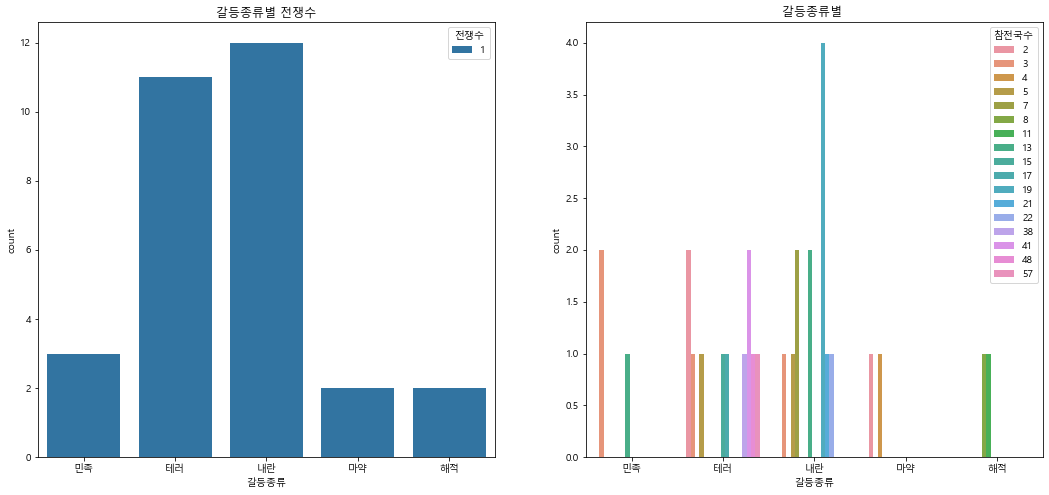

In [159]:
f,ax = plt.subplots(1, 2, figsize=(18,8))

sns.countplot('갈등종류', hue = "전쟁수", data=ls_war2, ax=ax[0])
ax[0].set_title('갈등종류별 전쟁수')

sns.countplot('갈등종류', hue = '참전국수', data=ls_war2, ax=ax[1])
ax[1].set_title('갈등종류별 ')

plt.show();

d:\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


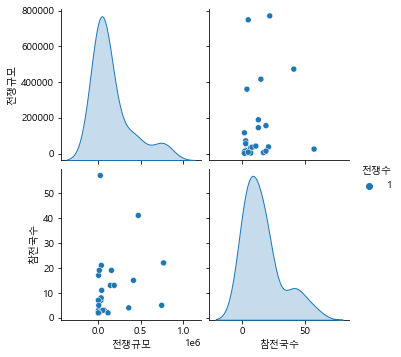

In [161]:
sns.pairplot(ls_war2, hue="전쟁수")
plt.show()